## matplotlib 으로 그래프 그리기

seaborn 라이브러리의 tips data set(데이터 집합)을 가져와서 실습한다.

In [43]:
import seaborn as sns
tips = sns.load_dataset("tips").copy()
tips = tips.rename({'sex':'gender'},axis='columns')
tips.head()

,total_bill,tip,gender,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


예전에는 
%matplotlib inline (매직함수)를 
호출해야만 jupyter notebook에서 graph를 그릴수있었다.

지금은 버젼업되어서 매직함수 없이 가능 함.

### 기초 그래프 그리기 

**1. 히스토그램**

히스토그램은 데이터프레임의 열 데이터의 분포와 빈도를 살펴보는 용도로 자주 사용되는 그래프이다.
데이터프레임의 total_bill, tip,..등의 열을 변수라고 부르기도 한다. 
그리고 변수를 하나만 사용해서 그린 그래프를 '일변량 그래프'라 한다.
 
순서:
1. 기본 틀(fig)을 만들어서, 그래프 격자(axes1)를 만들고 그래프를 그린다.
2. hist메서드로 히스토그램을 만든다.
3. set_title로 그래의 제목과 x, y축의 제목은 set_xlabel, set_ylabel로 만든다.

In [44]:
import matplotlib.pyplot as plt

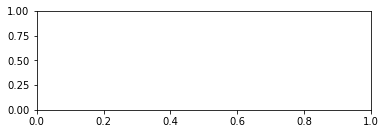

In [45]:
fig1 = plt.figure() #기본 틀 만들기
axes1 = fig1.add_subplot(2,1,1) #subsplot (격자) axes1생성 (2행, 1열, 첫번째)

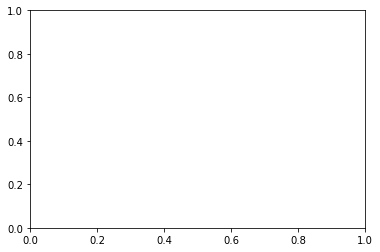

In [46]:
fig = plt.figure() #기본 틀 만들기
axes = fig.add_subplot(1,1,1) #subsplot (격자) axes1생성 (1행, 1열, 첫번째)

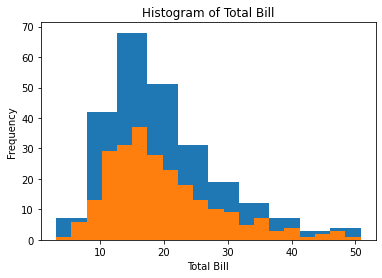

In [47]:
axes.hist(tips['total_bill'],bins=10)
axes.set_title("Histogram of Total Bill")
axes.set_xlabel("Total Bill")
axes.set_ylabel("Frequency")
axes.hist(tips['total_bill'],bins=20) # 이렇게 bins값을 바꾸어서 Frequency bar갯수를 조정할 수 있다.
#bins = Total Bills를 얼마나 촘촘하 구간으로 나눌지
fig

Text(0, 0.5, 'Frequency')

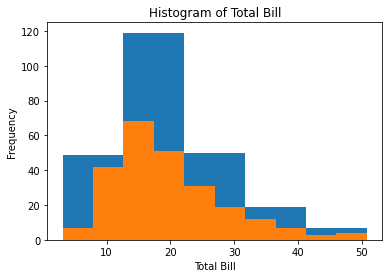

In [48]:
#plt로도 그래프를 그릴 수 있다
plt.hist(tips['total_bill'],bins=5)
plt.hist(tips['total_bill'],bins=10)
plt.title('Histogram of Total Bill')
plt.xlabel('Total Bill')
plt.ylabel('Frequency')

**2. 산점도 그래프**

산점도 그래프는 2개의 변수를 사용해서 만든다.
변수 2개를 사용하기 때문에 '이변량 그래프'라 한다. 

total_bill열에 따른 tip열의 분포를 나타내는 산점도 그래프이다. scatter 메서드를 이용한다.

Text(0, 0.5, 'Tip')

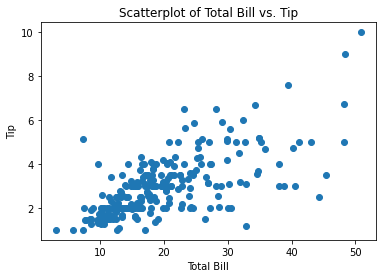

In [49]:
scatter_plot = plt.figure()
axes1 = scatter_plot.add_subplot(1,1,1)
axes1.scatter(tips['total_bill'], tips['tip']) #변수 2개를 지정
axes1.set_title('Scatterplot of Total Bill vs. Tip')
axes1.set_xlabel('Total Bill')
axes1.set_ylabel('Tip')

**3. Box graph 박스 그래프**

박스그래프는 Female, Male과 같이 명확하게 구분되는 값과 Tip과 같이 명확하게 셀 수 없는 범위의 값을 함께 사용하는 그래프이다.

 -  boxplot 메서드를 사용하면 박스 그래프를 그릴 수 있다.
 -  tips 데이터프레임에서 성별이 Female 인 데이터와 Male인 데이터에서
    tip 열 데이터만 추출해서 리스트에 담아 전달한다.
 - labels 인자값으로 성별을 구분하기 위한 이름을 추가한다.

Text(0.5, 1.0, 'Bosplot of Tips by Gender')

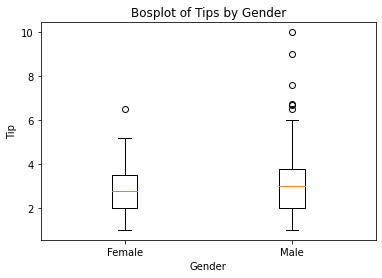

In [50]:
boxplot = plt.figure()
axes1 = boxplot.add_subplot(1,1,1)

axes1.boxplot(
    [tips[tips['gender'] == 'Female']['tip'],
    tips[tips['gender'] == 'Male']['tip']],
    labels = ['Female', 'Male'])

axes1.set_xlabel('Gender')
axes1.set_ylabel('Tip')
axes1.set_title('Bosplot of Tips by Gender')

### 다변량 그래프 그리기

3개 이상의 변수를 사용하는 다변량 그래프를 그려보자.

지불금액(total_bill)과 팁(tip)만을 사용했던 산점도에 성별을 추가하여 산점도 그래프 표현하기
- 성별은 산점도 그래프의 색상으로 구분한다.
- 색상을 지정하기 위해서 Female, Male같은 문자는 사용할 수 없고 정수 0, 1를
  사용해야 한다. 
- 문자열을 정수로 치환하는 함수를 만들어 사용한다.



In [51]:
def recode_gender(gender):
    if gender == 'Female':
        return 0
    else:
        return 1


- recode_gender함수의 반환값(0, 1)이저장할 gender_color변수를 데이터프레임에 생성한다.
- apply 메서드를 이용하여 recode_gender 메서드를 브로드캐스팅한다.
- tips의 성별열의 값 모두를 recode_gender 메서드를 적용하여 반환되는 값을 gender_color변수에 저장한다.

In [57]:
tips['gender_color'] = tips['gender'].apply(recode_gender)
tips.head()

,total_bill,tip,gender,smoker,day,time,size,gender_color
0,16.99,1.01,Female,No,Sun,Dinner,2,0
1,10.34,1.66,Male,No,Sun,Dinner,3,1
2,21.01,3.50,Male,No,Sun,Dinner,3,1
3,23.68,3.31,Male,No,Sun,Dinner,2,1
4,24.59,3.61,Female,No,Sun,Dinner,4,0


Text(0, 0.5, 'Tip')

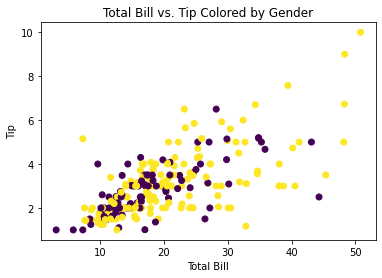

In [70]:
scatter_plot = plt.figure() 
axes1 = scatter_plot.add_subplot(1,1,1) #그래프가 그려질 격자 생성
axes1.scatter(                 # 산점도 그래프 scatter 메소드
    x=tips['total_bill'],      # bill 금액
    y=tips['tip'],             # tip 금액
    c=tips['gender_color'])    # 성별에 따른 지환값

axes1.set_title('Total Bill vs. Tip Colored by Gender')
axes1.set_xlabel('Total Bill')
axes1.set_ylabel('Tip')

산점도 그래프에 테이블당 인원 수(size)를 추가한다.

- 테이블당 인원 수(size)는 점의 크기로 표현한다.
- scatter메서드의 s(size,점의 크기), c(color,점의 색상) 인자값으로
  테이블당 인원 수와 성별 치환값을 전달한다.
- alpha 인자값을 조절하여 점의 투명도를 보기좋게 조절한다.

Text(0, 0.5, 'Tip')

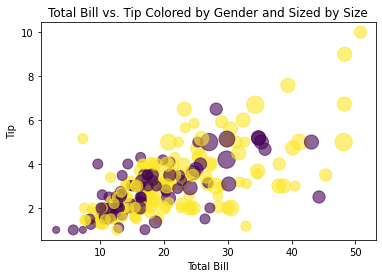

In [69]:
scatter_plot = plt.figure() 
axes1 = scatter_plot.add_subplot(1,1,1) #그래프가 그려질 격자 생성
axes1.scatter(                 # 산점도 그래프 scatter 메소드
    x=tips['total_bill'],      # bill 금액
    y=tips['tip'],             # tip 금액
    s=tips['size']*50,         # 테이블당 인원수 *50 (크기조절 위해)
    c=tips['gender_color'],    # 성별에 따른 지환값
    alpha=0.6)                 # 투명도

axes1.set_title('Total Bill vs. Tip Colored by Gender and Sized by Size')
axes1.set_xlabel('Total Bill')
axes1.set_ylabel('Tip')

### 한글 사용하기

※ matplotlib은 한글폰드를 지원하지 않아서 그래프 제목이나, x,y축 제목을
   한글로 표현하려면 OS에서 제공하는 한글 폰트를 가져와서 사용해야하지만,
   컴퓨터 os에 존재하는 한글 font를 가져와서 사용할 수 있다.

In [72]:
import platform

path = "c:/Windows/Fonts/malgun.ttf"

from matplotlib import font_manager, rc

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~') 

Text(0, 0.5, '팁 금액')

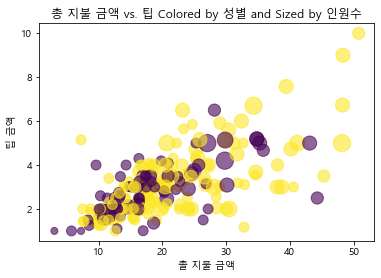

In [73]:
# graph title과 axes label에 한글 사용하기

scatter_plot = plt.figure() 
axes1 = scatter_plot.add_subplot(1,1,1) #그래프가 그려질 격자 생성
axes1.scatter(                 # 산점도 그래프 scatter 메소드
    x=tips['total_bill'],      # bill 금액
    y=tips['tip'],             # tip 금액
    s=tips['size']*50,         # 테이블당 인원수 *50 (크기조절 위해)
    c=tips['gender_color'],    # 성별에 따른 지환값
    alpha=0.6)                 # 투명도

axes1.set_title('총 지불 금액 vs. 팁 Colored by 성별 and Sized by 인원수')
axes1.set_xlabel('촐 지불 금액')
axes1.set_ylabel('팁 금액')

## seaborn 라이브러리 활용하기

seaborn는 matplotlib으로 그래프를 그릴때 좀더 화려하고 예쁘게 그릴수 있게 한다.

seaborn 라이브러리는 matplotlib 라이브러리를 기반으로 만들었다.

In [74]:
#import seaborn as sns (위에서 이미 import했음)
tips = sns.load_dataset("tips")
tips = tips.rename({'sex':'gender'},axis='columns')
tips.head()

,total_bill,tip,gender,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### 다변량 그래프 그리기

**1. Histogram**

히스토그램은 subplots, distplot 메서드를 사용한다.

    -subplots로 기본 틀을 만들고 displot 메서드에 total_bill열 데이터 전달한다.
    -displot 메서드는 히스토그램과 밀집도 그래프를 같이 그려준다.

※ 밀집도 그래프 : 주어진 데이터를 정규화시켜 넓이가 1이 되도록 그린 그래프 밀집도 그래프를 제외하고 싶으면 kde 인자값을 False로 설정한다.


In [10]:
import warnings
warnings.filterwarnings(action='ignore')

Text(0.5, 1.0, 'Total Bill Histogram with Density Plot')

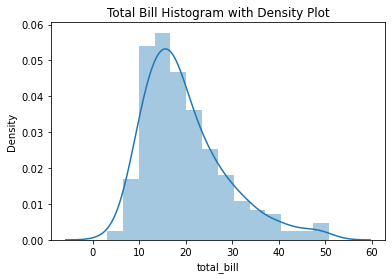

In [11]:
ax = plt.figure() 
ax = sns.distplot(tips['total_bill'])
ax.set_title('Total Bill Histogram with Density Plot')

Text(0, 0.5, 'Frequency')

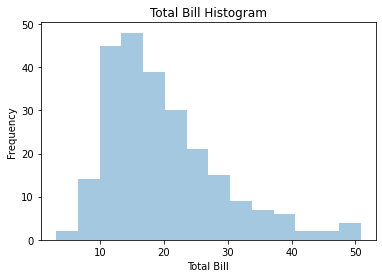

In [12]:
# kde = False 로 밀도 line graph를 제외할 수 있다

ax = plt.figure()
ax = sns.distplot(tips['total_bill'], kde=False)
ax.set_title('Total Bill Histogram')
ax.set_xlabel('Total Bill')
ax.set_ylabel('Frequency')

Text(0, 0.5, 'Frequency')

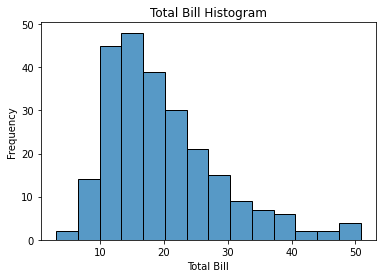

In [13]:
# distplot대신 histsplot을 사용할 수 있다

ax = plt.figure()
ax = sns.histplot(tips['total_bill'])
ax.set_title('Total Bill Histogram')
ax.set_xlabel('Total Bill')
ax.set_ylabel('Frequency')

Text(0, 0.5, 'Frequency')

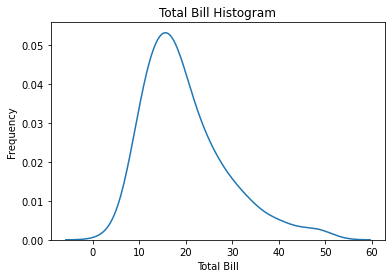

In [14]:
# 밀집도 line graph만 나타내려면 hist = False로 지정한다.

ax = plt.figure()
ax = sns.distplot(tips['total_bill'], hist=False)
ax.set_title('Total Bill Histogram')
ax.set_xlabel('Total Bill')
ax.set_ylabel('Frequency')

**2. rug인자 활용 - rug graph포함 여러 graph 함께출력**

rug인자를 추가하면 양탄자(rug) 그래프도 포함하여 여러그래프를 한꺼번에 출력할 수 있다.

※ rug (양탄자) graph : 그래프 축에 동일한 길이의 직선을 붙여 데이터의 밀집 정도를 표현한 그래프이다.
A rug plot is a plot of data for a single quantitative variable, displayed as marks along an axis. It is used to visualise the distribution of the data. As such it is analogous to a histogram with zero-width bins, or a one-dimensional scatter plot.(Wikipedia)


Text(0.5, 0, 'Total Bill')

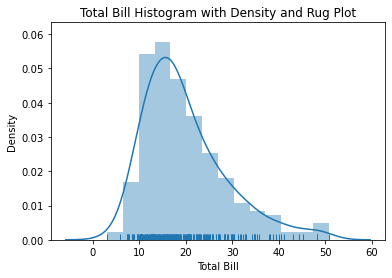

In [15]:
hist_den_rug, ax = plt.figure()
ax = sns.distplot(tips['total_bill'], rug=True)
ax.set_title('Total Bill Histogram with Density and Rug Plot')
ax.set_xlabel('Total Bill')

**3. count graph:**

히스토그램과 비슷한 count 그래프는 명확하게 구분되는 이산값을 나타낸그래프이다. 

countplot 메서드에 tips의 day열의 count 그래프를 그린다.

Text(0, 0.5, 'Frequency')

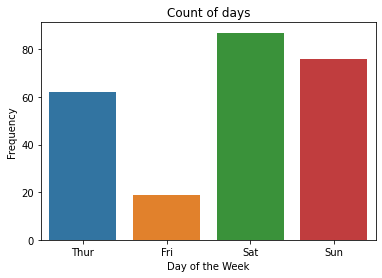

In [16]:
x = plt.figure()
ax = sns.countplot('day', data=tips)
ax.set_title('Count of days')
ax.set_xlabel('Day of the Week')
ax.set_ylabel('Frequency')

### 다양한 종류의 이변량 graph그리기

**seaborn의 산점도 그래프**

matplotlib보다 다양한 방법으로 산점도 그래프를 그릴 수 있다.

regplot 메서드로 산점도 그래프와 회귀선을 함께 그릴 수 있다.

Text(0, 0.5, 'Tip')

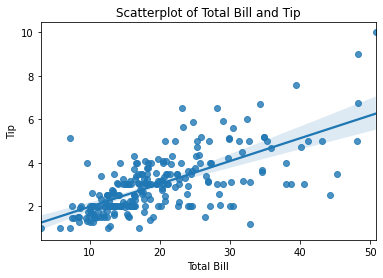

In [18]:
ax = plt.figure()
ax = sns.regplot(x='total_bill', y='tip', data=tips)
ax.set_title('Scatterplot of Total Bill and Tip')
ax.set_xlabel('Total Bill')
ax.set_ylabel('Tip')

Text(0, 0.5, 'Tip')

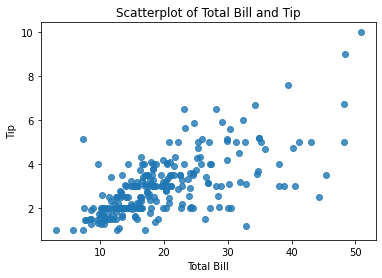

In [19]:
# 회귀선을 제거하려면 fit_reg = False로 지정한다.

ax = plt.figure()
ax = sns.regplot(x='total_bill', y='tip', data=tips, fit_reg=False)
ax.set_title('Scatterplot of Total Bill and Tip')
ax.set_xlabel('Total Bill')
ax.set_ylabel('Tip')

### 산점도와 히스토그램을 한 번에 그려주는 jointplot 메서드 사용

seaborn을 통해 graph join 가능

Text(0.5, 1.03, 'Joint Plot of Total Bill and Tip')

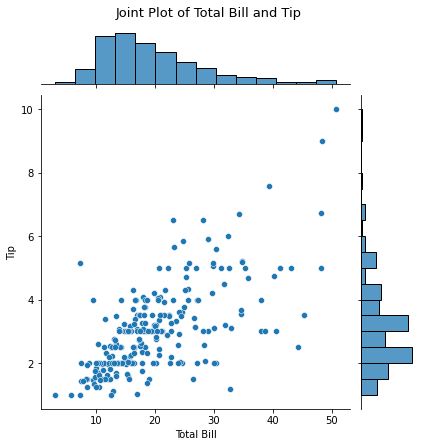

In [28]:
joint = sns.jointplot(x='total_bill', y='tip', data=tips)
joint.set_axis_labels(xlabel = 'Total Bill', ylabel='Tip')
joint.fig.suptitle('Joint Plot of Total Bill and Tip', fontsize=13, y=1.03)

**1. hexbin(육각 그래프)**

산점도의 점이 겹쳐 구분하기 어려울 경우 육각 그래프(hexbin)를 사용한다.

육각 그래프는 2차원 표면에 육각형으로 데이터를 쌓아 표현하는 그래프이다.

특정 데이터의 개수가 많아지면 점점 진한색으로 표현된다. kind = 'hex'로한다.

Text(0.5, 1.03, 'Hexbin Joint of Total Bill and Tip')

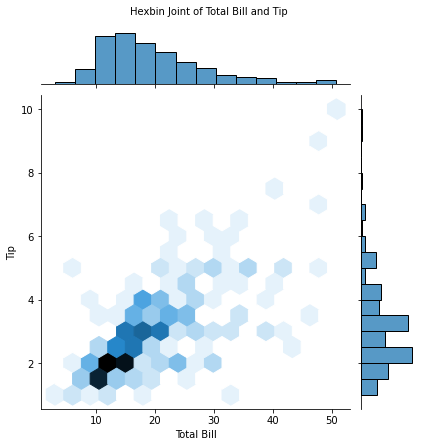

In [26]:
hexbin = sns.jointplot(x='total_bill', y='tip', data=tips, kind='hex')
hexbin.set_axis_labels(xlabel='Total Bill', ylabel='Tip')
hexbin.fig.suptitle('Hexbin Joint of Total Bill and Tip', fontsize=10, y=1.03)

**2. 이차원 밀집도 그리기**

이차원 밀집도는 kdeplot 메서드로 만든다. total_bill,tip열을 사용한다.

shade = True로 지정하면 그래프에 음영 효과를 줄 수 있다.

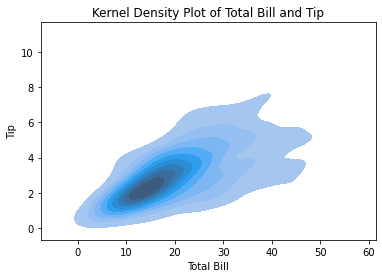

In [34]:
ax = plt.figure()
ax = sns.kdeplot(data=tips['total_bill'],
                 data2=tips['tip'], 
                 shade=True)
ax.set_title('Kernel Density Plot of Total Bill and Tip')
ax.set_xlabel('Total Bill')
ax.set_ylabel('Tip')
plt.show()

**3. bar graph 바 그래프 그리기**

지정한 변수의 평균을 계산하여 그릴 수 있다.

다음은 시간에 따른 지불한 비용의 평균을 나타낸것이다.

Text(0, 0.5, 'Average total bill')

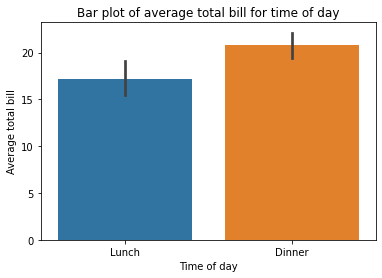

In [31]:
ax = plt.figure()
ax = sns.barplot(x='time', y='total_bill', data=tips)
ax.set_title('Bar plot of average total bill for time of day')
ax.set_xlabel('Time of day')
ax.set_ylabel('Average total bill')

**4. box graph 박스그래프 그리기**

박스 그래프는 최솟값, 1분위수(25%위치값), 2분위값(중간값),3분위값(75%위치값), 최댓값, 이상치 등 다양한 통계량을 한 번에 표현하는 그래프이다.

※ 사분위수는 데이터 표본을 4개의 동일한 부분으로 나눈 값이다.

사분위수를 사용하여 데이터 집합의 범위와 중심 위치를 신속하게 평가할 수 있다. 이는 데이터를 이해하는 데 중요한 단계이다.

Text(0, 0.5, 'Total Bill')

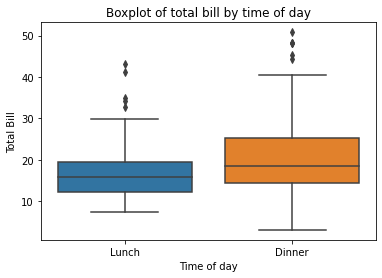

In [35]:
ax = plt.figure()
ax = sns.boxplot(x='time', y='total_bill', data=tips)
ax.set_title('Boxplot of total bill by time of day')
ax.set_xlabel('Time of day')
ax.set_ylabel('Total Bill')

**5. 바이올린 그래프**

- 데이터의 분산을 확인하기 좋은 그래프이다.
- violinplot 메서드를 사용하여 그릴 수 있다.

※ 분산 : 통계 분석에서 자주 사용하는 기본 단위로 데이터가 평균을 중심으로 퍼져있는 정도이다. 
    분산이 크면 들죽날죽 불안정하다는 의미이다.

Text(0, 0.5, 'Total Bill')

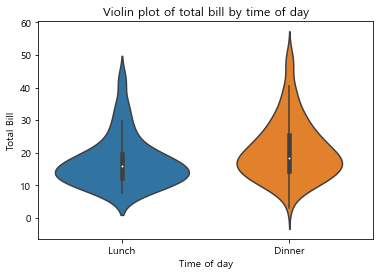

In [75]:
ax = plt.figure()
ax = sns.violinplot(x='time',y='total_bill', data=tips)
ax.set_title('Violin plot of total bill by time of day')
ax.set_xlabel('Time of day')
ax.set_ylabel('Total Bill')

**6. 관계 그래프**

- 종합적 그래프이다. pairplot 메서드에 데이터프레임을 넣는 방법으로 간단하게 그린다.
- 관계그래프는 중복된 정보가 표현되는 단점이 있다. 
- 관계그래프의 절반(대각선을 기준으로 위)은 나머지 절반(대각선을 기준으로 아래)과 같다. 


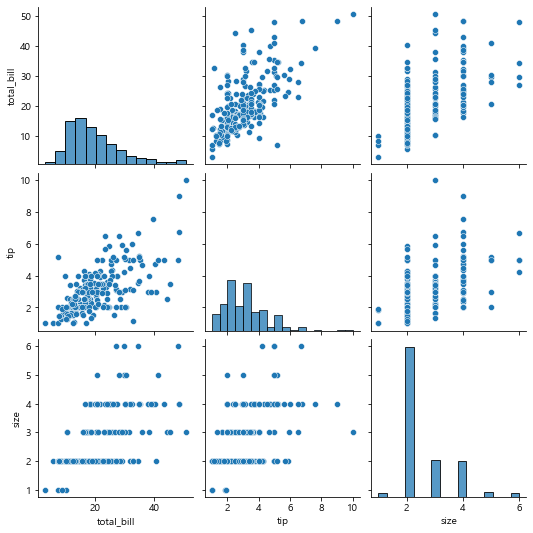

In [77]:
sns.pairplot(tips)

중복된 그래프가 그려진 위치를 직접 지정하여 원하는 그래프로 교체할 수 있다.

- map_upper : 대각선을 기준으로 위쪽에 그릴 그래프를 지정한다.
- map_lower : 대각선을 기준으로 아래쪽에 그릴 그래프를 지정한다. 
- map_diag : 대각선을 중심으로 그래프를 그린다.

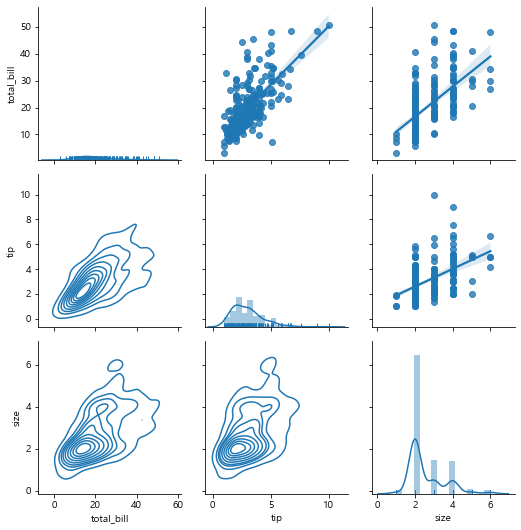

In [78]:
pair_grid = sns.PairGrid(tips)
pair_grid = pair_grid.map_upper(sns.regplot) #대각선 기준 위쪽에는 산점도 scatterplot
pair_grid = pair_grid.map_lower(sns.kdeplot) #대각선 기준 아래쪽에는 이차원 밀집도
pair_grid = pair_grid.map_diag(sns.distplot, rug=True) #대각선 중심으로 히스토그램, 밀집도
plt.show()

### 다변량 그래프

**1. 바이올린 그래프**
  - category 자료형 column 값을 기준으로 나누어서 지불 금액의 분포를 그린다. (e.g., 'time'=Lunch vs. Dinner or 'gender'=Female vs. Male) 
  - categorical 값을 구분 할 색상을 그래프에 추가한다.(e.g., hue='time' or hue='gender')

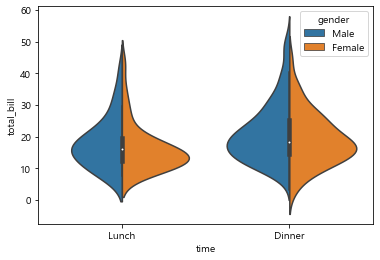

In [79]:
ax = plt.figure()
ax = sns.violinplot(x='time', y='total_bill', hue='gender', data=tips, split=True)
plt.show()

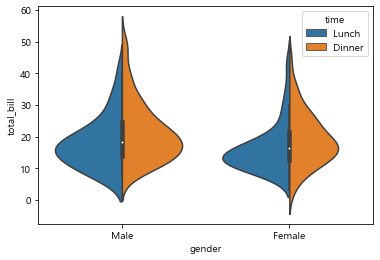

In [81]:
ax = plt.figure()
ax = sns.violinplot(x='gender', y='total_bill', hue='time', data=tips, split=True)
plt.show()

**2. 산점도 그래프과 관계스래프 색상 추가**

다변량에서 산점도는 lmplot 메서드를 사용하고 색상에 따른 성별을 추가한다.

hue = 'gender'를 지정한다.

<Figure size 432x288 with 0 Axes>

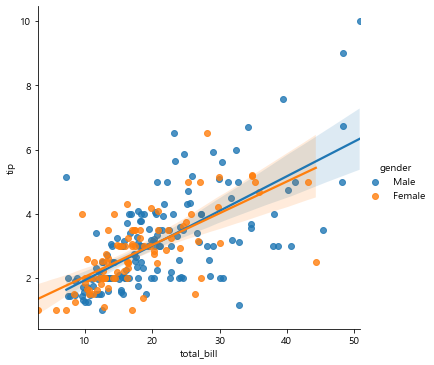

In [87]:
ax = plt.figure()
ax = sns.lmplot(x='total_bill', y='tip', data=tips, hue='gender', fit_reg=True) #lmplot: LMPLOT (소문자 L이다)
plt.show()

관계형 그래프에도 hue=gender를 지정해서 성별로 나뉘어 total bill vs. tip 관계를 observe할 수 있다.

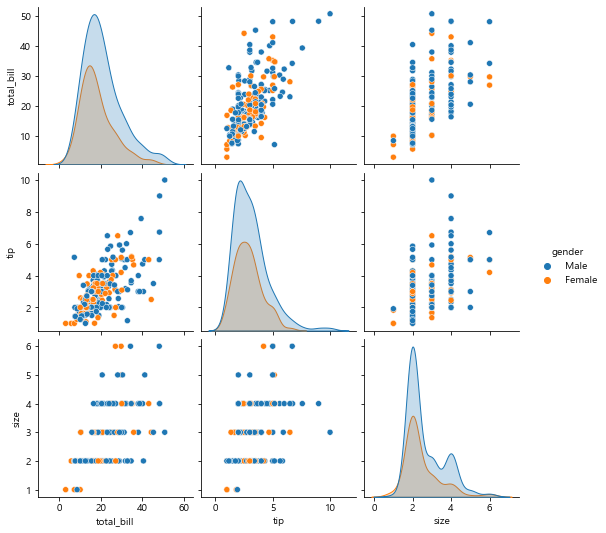

In [84]:
sns.pairplot(tips, hue='gender')
plt.show()

**3. lmplot 메서드 활용 -  4개의 데이터 그룹에 대한 그래프 한 번에 그리기**

- 4개의 그룹이 한꺼번에 산점도 그래프를 그릴 수 있다.
- col, col_wrap인자로 데이터 그룹을 구분할 열과 하나의 행에 보여줄 열의 최대값을 지정한다.
- day별 그룹으로 지불금액과 팀의 그래프를 그린다.

<Figure size 432x288 with 0 Axes>

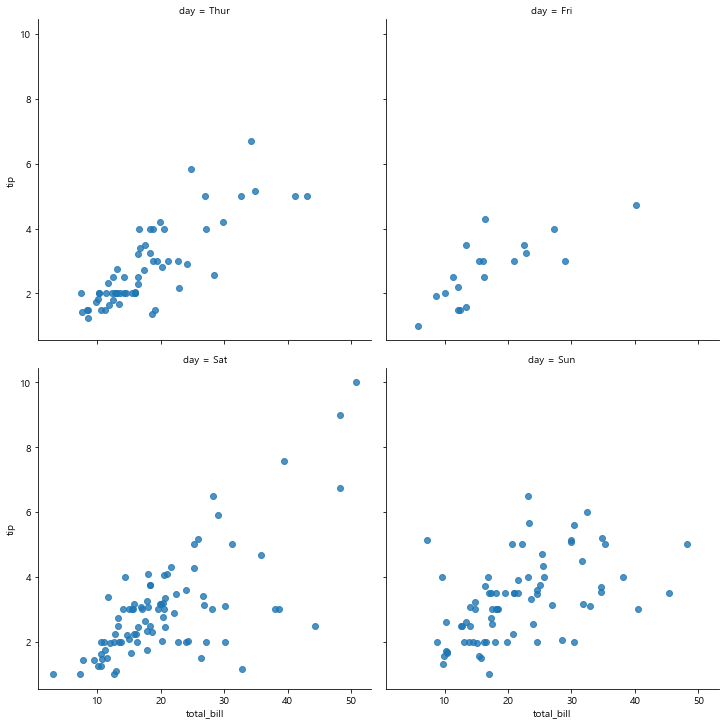

In [90]:
ax = plt.figure()
ax = sns.lmplot(x='total_bill', y='tip', data=tips, fit_reg = False,  
                col='day', col_wrap=2) #여기부터 그룹핑을 위해 추가된 부분
                                        #col='day'로 데이터를 나눌 그룹을 지정, col_wrap=2 한행에 지정한 갯수만큼 그린다.
plt.show()

<Figure size 432x288 with 0 Axes>

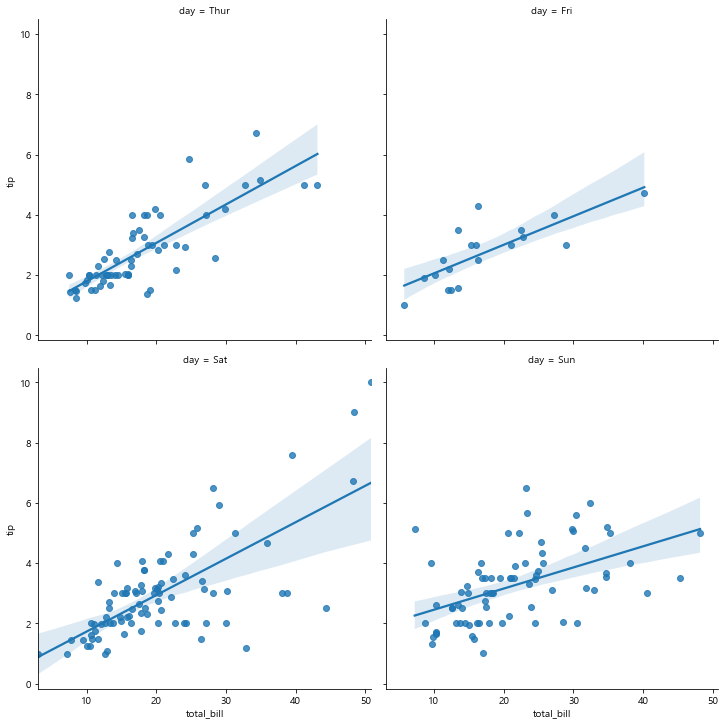

In [86]:
ax = plt.figure()
ax = sns.lmplot(x='total_bill', y='tip', data=tips, fit_reg = True, 
                col='day', col_wrap=2) #col_wrap 한행에 2개씩 그린다.
plt.show()

**4. FaceGrid 클래스로 그룹별 그래프 그리기**

- FaceGrid에 데이터프레임을 그룹을 구분할 이름을 전달하여 객체생성한다.
- 객체에 map 메서드에 그래프의 종류와 x축으로 지정할 열 이름을 순서대로 전달하면 히스토그램, 밀집도, 양탄자를 그릴 수 있다.

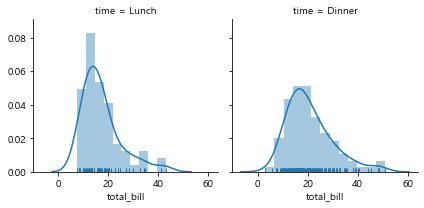

In [93]:
facet = sns.FacetGrid(tips, col='time') #시간에 따른 지불금액을 그룹별 그래프를 그린다.
facet.map(sns.distplot, 'total_bill', rug=True)
plt.show()

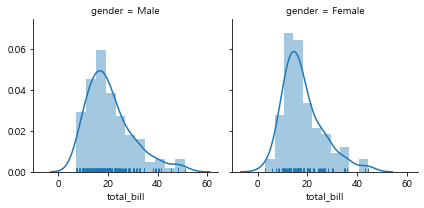

In [94]:
facet = sns.FacetGrid(tips, col='gender') #성별에 따른 지불금액을 그룹별 그래프를 그린다.
facet.map(sns.distplot, 'total_bill', rug=True)
plt.show()

**다변량 그래프 - 산점도**

산점도는 map 메서드에 그래프 종류로 plt.scatter를 전달한다.

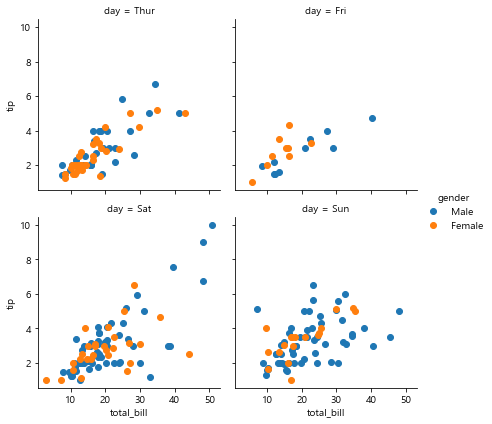

In [96]:
#day별 그룹으로 구분하여 지불금액의 scatter그래프를 그린다.
facet = sns.FacetGrid(tips, col='day', hue='gender', col_wrap=2)
facet.map(plt.scatter, 'total_bill', 'tip')
facet.add_legend()
plt.show()

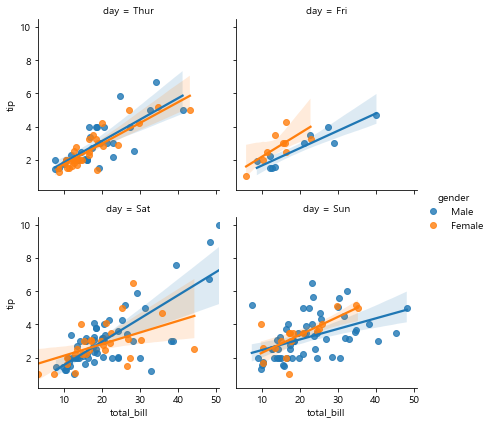

In [100]:
#day별 그룹으로 구분하여 지불금액의 regplot 그래프를 그린다. (fit_reg=False로 fit-line을 지울 수도 있다)
ax = sns.FacetGrid(tips, col='day', hue='gender', col_wrap=2)
ax.map(sns.regplot, 'total_bill', 'tip', fit_reg=True)
ax.add_legend()
plt.show()

col = 'time', row = 'smoker' 을 사용하여 산점도 그래프를 그린다.

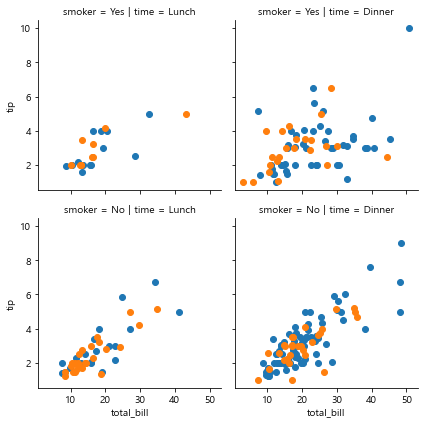

In [101]:
facet = sns.FacetGrid(tips, col='time', row='smoker', hue='gender') #열로 time 구분, 행으로 smoker 구분
facet.map(plt.scatter, 'total_bill', 'tip')
plt.show()

### seaborn의 graph style 설정

seaborn의 style은 darkgrid, whitegrid, dark, white, ticks로 5종류이다.
set_style메서드를 사용하여 그래프의 스타일을 설정할 수 있다.


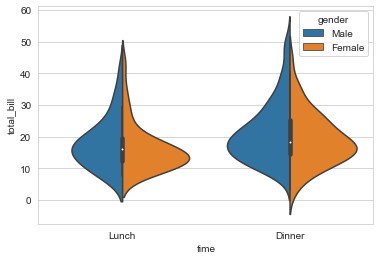

In [104]:
ax = plt.figure()
sns.set_style('whitegrid')
ax = sns.violinplot(x='time',y='total_bill',hue='gender',data=tips, split=True)

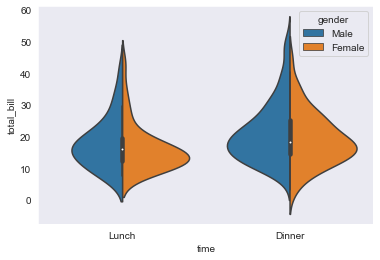

In [105]:
sns.set_style('dark')
ax = sns.violinplot(x='time',y='total_bill',hue='gender',data=tips, split=True)
plt.show()

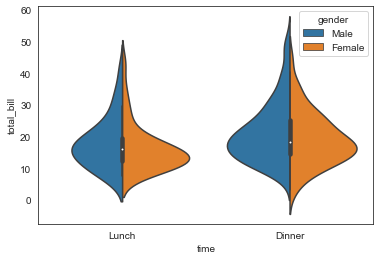

In [106]:
sns.set_style('white')
ax = sns.violinplot(x='time',y='total_bill',hue='gender',data=tips, split=True)
plt.show()

## DataFrame과 Series로 그래프 그리기

Pandas의 자료형 DataFrame과 Series로 간편하게 그래프를 그릴 수 있다.

위에서 seaborn을 사용한 그래핑 방법이 아닌! Dataframe 또는 Series의  속성에 정의된 몇가지 그래핑 메서드를 사용하는 것이다.

(e.g., Series의 plot속성의 hist 메서드로 시리즈의 값을 히스토그램을 바로 그릴 수 있음) 

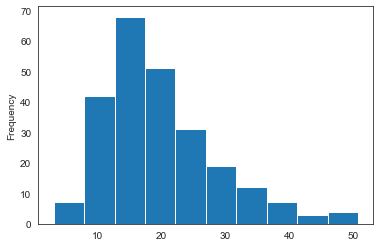

In [122]:
sns.set_style('white') #따로 스타일이 없이 기본 화이트 설정된다.
tips['total_bill'].plot.hist()
plt.show()

hist메서드의 인자값들:

alpha: 투명도

bins: x축의 간격

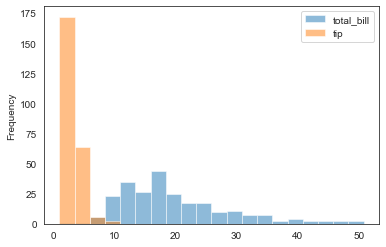

In [109]:
tips[['total_bill','tip']].plot.hist(alpha=0.5, bins=20)
plt.show()

밀집도는 kde 메서드를 사용하여 그릴 수 있다.

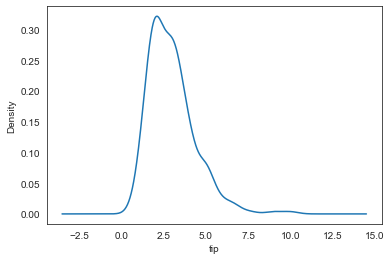

In [118]:
tips['tip'].plot.kde()
plt.xlabel('tip')
plt.show() #결과: 대략 $2~4사이가 가장 밀집도가 높은 tip 범위 이다.

산점도는 scatter 메서드를 사용하여 그래프를 그린다.

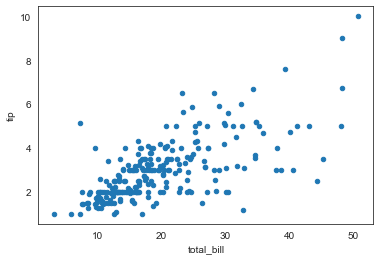

In [119]:
tips.plot.scatter(x='total_bill', y='tip')
plt.show()

육각 그래프는 hexbin 메서드를 사용한다. gridsize인자값을 지정해서 육각의 크기를 조절할 수 있다.

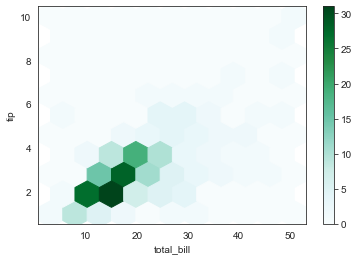

In [120]:
#hexbin은 subplot을 사용해야지 x축 label이 보인다. (ax=plt.figure()을 사용하면 xlablel이 안보임)
ax=plt.subplot()
tips.plot.hexbin(x='total_bill', y='tip', gridsize=10, ax=ax)
plt.show()

박스그래프는 box 메서드를 사용한다.

<Figure size 432x288 with 0 Axes>

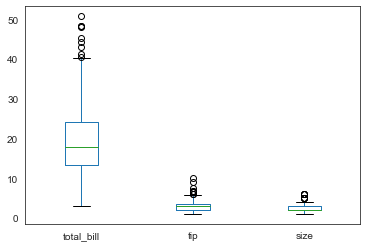

In [121]:
ax = plt.figure()
tips.plot.box()
plt.show()
#tips data set에서 number로 범위를 graph할 수 있는 3개의 column만(total_bill, tip, size) 그래프된다.
#각각 total_bill, tip, size의 범위를 보여준다. 